<a href="https://colab.research.google.com/github/NahuelCostaCortez/rapidae/blob/main/examples/rvae_AF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atrial Fibrillation classification with RVAE

In [1]:
# Install the library

!pip install rapidae

In [3]:
import numpy as np
from keras import utils
from rapidae.data import load_dataset
from rapidae.models import RVAE
from rapidae.pipelines import TrainingPipeline
from rapidae.evaluate import plot_latent_space

### Data

In this example, the selected dataset is composed of synthetic atrial fibrillation records.

In [4]:
data = load_dataset("AtrialFibrillation")

x_train, y_train_orig = data["x_train"], data["y_train"]
x_val, y_val_orig = data["x_val"], data["y_val"]
x_test, y_test_orig = data["x_test"], data["y_test"]

# Obtain number of clasess
n_classes = len(np.unique(y_train_orig))

# Convert labels to categorical
y_train = utils.to_categorical(y_train_orig, n_classes)
y_val = utils.to_categorical(y_val_orig, n_classes)
y_test = utils.to_categorical(y_test_orig, n_classes)

2024-04-17 11:15:41 [INFO]: Downloading arrhythmia_data.npy...
2024-04-17 11:15:42 [INFO]: Deleting data...


### Model

In [6]:
timesteps = x_train.shape[1]
num_features = x_train.shape[2]

model = RVAE((timesteps, num_features))

2024-04-17 11:15:46 [INFO]: Trying to set encoder and decoder from child class...
2024-04-17 11:15:46 [INFO]: Encoder set from rvae
2024-04-17 11:15:46 [INFO]: Decoder set from rvae


### Training

In [7]:
epochs = 30
batch_size = 128

pipe = TrainingPipeline(name='RVAE_AtrialFibrillation', 
                        learning_rate=0.001,
                        model=model, 
                        num_epochs=epochs, 
                        batch_size=batch_size)

trained_model = pipe(x=x_train, y=y_train, x_val=x_val, y_val=y_val)

2024-04-17 11:15:51 [INFO]: +++ RVAE_AtrialFibrillation +++
2024-04-17 11:15:51 [INFO]: Creating folder in ./output_dir/RVAE_AtrialFibrillation_2024-04-17_11-15
2024-04-17 11:15:51 [INFO]: 
TRAINING STARTED
	Backend: tensorflow
	Eager mode: False
	Validation data available: False
	Callbacks set: ['EarlyStopping', 'ModelCheckpoint'] 



Epoch 1/30


2024-04-17 11:15:51.955647: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-04-17 11:15:54.651167: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904



Epoch 1: loss improved from inf to 670.31897, saving model to ./output_dir/RVAE_AtrialFibrillation_2024-04-17_11-15/model.weights.h5
315/315 - 20s - 62ms/step - clf_loss: 316.2384 - kl_loss: 11.7046 - loss: 670.3190 - reconstruction_loss: 342.3758
Epoch 2/30

Epoch 2: loss improved from 670.31897 to 342.70117, saving model to ./output_dir/RVAE_AtrialFibrillation_2024-04-17_11-15/model.weights.h5
315/315 - 15s - 48ms/step - clf_loss: 143.0769 - kl_loss: 14.4571 - loss: 342.7012 - reconstruction_loss: 185.1674
Epoch 3/30

Epoch 3: loss improved from 342.70117 to 320.06601, saving model to ./output_dir/RVAE_AtrialFibrillation_2024-04-17_11-15/model.weights.h5
315/315 - 15s - 49ms/step - clf_loss: 133.0321 - kl_loss: 11.6822 - loss: 320.0660 - reconstruction_loss: 175.3518
Epoch 4/30

Epoch 4: loss improved from 320.06601 to 299.67725, saving model to ./output_dir/RVAE_AtrialFibrillation_2024-04-17_11-15/model.weights.h5
315/315 - 15s - 47ms/step - clf_loss: 121.8143 - kl_loss: 10.7289 - 

2024-04-17 11:23:09 [INFO]: Restoring best model
2024-04-17 11:23:09 [INFO]: Best model restored


### Evaluation

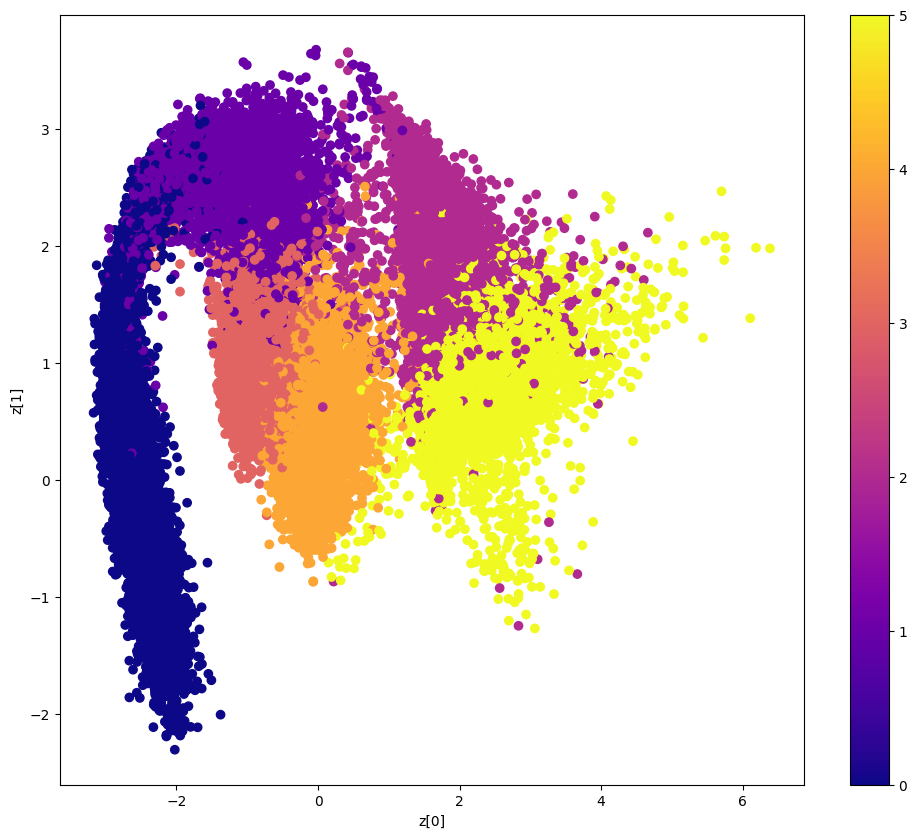

In [9]:
outputs = trained_model.predict(x_train)
plot_latent_space(outputs['z'], y_train_orig)

In [11]:
from rapidae.evaluate import evaluate
from sklearn.metrics import accuracy_score

outputs_test = trained_model.predict(x_test)

evaluate(y_true=y_test_orig,
         y_hat=np.argmax(outputs_test['clf'], axis=1),
         sel_metric=accuracy_score)

420/420 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


2024-04-17 11:24:17 [INFO]: Using Scikit-learn metric...


test set results: [
	 accuracy_score: 0.9274553571428571 
]


0.9274553571428571